In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pyslabgrid.circ as circ
import pyslabgrid.slabrup as slabrup
from scipy.interpolate import interp1d
from scipy.interpolate import PPoly

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

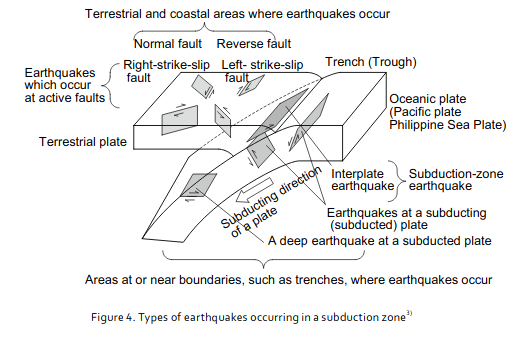

https://www.jaso.jp/pdf/earthquake_resistant.pdf

In [3]:
# for more rigourous classification of strikes
dump_hik = slabrup.get_GeoNetevents('hik')
dump_puy = slabrup.get_GeoNetevents('puy')
slabevents = {'hik': dump_hik, 'puy': dump_puy}
print('Number of events - Hikurangi: %d, Puysegur: %d' \
      %(len(slabevents['hik']['strike1']),len(slabevents['puy']['strike1'])))

Number of events - Hikurangi: 399, Puysegur: 76


In [4]:
critical_dip = {'hik': 45, 'puy': 0}
# trnsition dip for strike-chnage
# process_strikediprake(slabevents, szone, critical_dip=None):
dump_hik = slabrup.process_strikediprake(slabevents, 'hik', critical_dip=critical_dip)
dump_puy = slabrup.process_strikediprake(slabevents, 'puy', critical_dip=critical_dip)
procslabevents  = {'hik': dump_hik, 'puy': dump_puy,}
print('Number of events - Hikurangi: %d, Puysegur: %d' \
      %(len(procslabevents['hik']['strike']),len(procslabevents['puy']['strike'])))

Number of events - Hikurangi: 346, Puysegur: 67


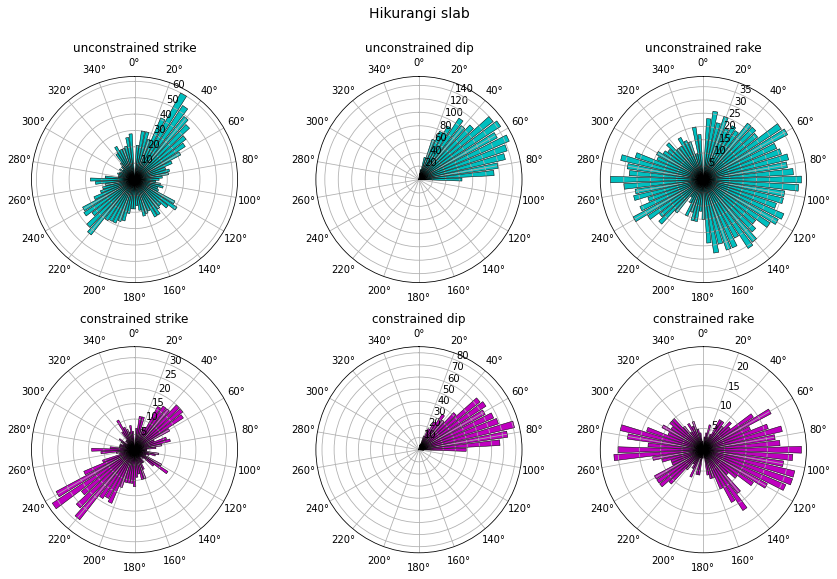

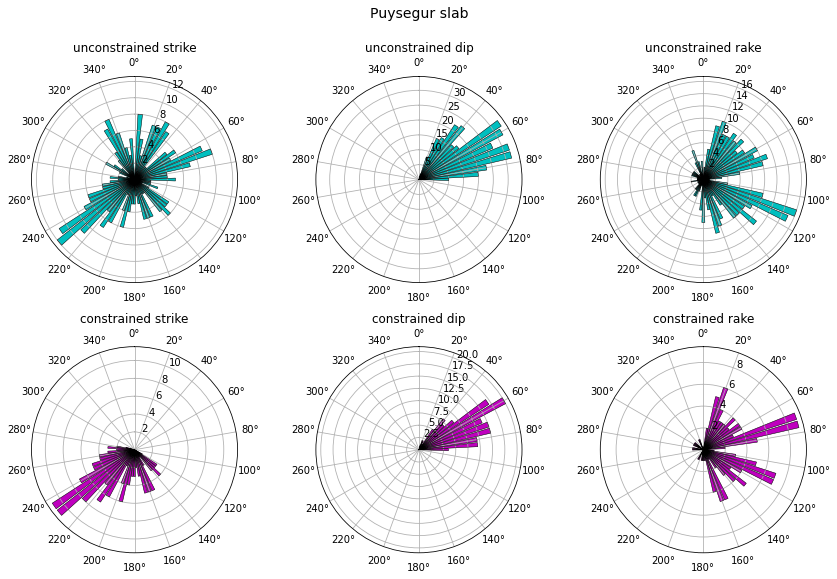

In [5]:
# let us see how the strike, dip & rakes looks like
dump_hik = slabrup.get_allstrikediprakes(slabevents, 'hik')
dump_puy = slabrup.get_allstrikediprakes(slabevents, 'puy')
xslabevents = {'hik': dump_hik, 'puy': dump_puy}

slabrup.review_strikediprake(xslabevents, procslabevents, 'hik')
plt.show()
slabrup.review_strikediprake(xslabevents, procslabevents, 'puy')

236.85155801383033 10.59252012158982
237.0032413049106 11.290578500347836
235.9128604239914 12.35528831863597
234.76560018840973 12.827604210968033
236.56871448706002 11.222982057792889
235.94380202585023 9.029692347124298
234.295136549758 7.938497987816092
234.66714511635962 8.947448854906698
238.3454098531869 9.022518790765618
56.96386821311038 10.482003671251944
54.68809180031504 11.24858528049232
56.402739530506906 10.52168990508597
54.87687761277004 9.605577316103178
51.766325901869955 9.677699859258837
54.86980417478144 10.375803091874252
56.21564938659037 10.223429644916303
54.58345466479738 9.611108036125254
56.893157247725206 8.332529654102318
55.89411423108751 8.299222466529342
53.56323731942108 9.597184731821532
52.64345282721749 12.50013383149632
49.8169601765412 11.873463728175516


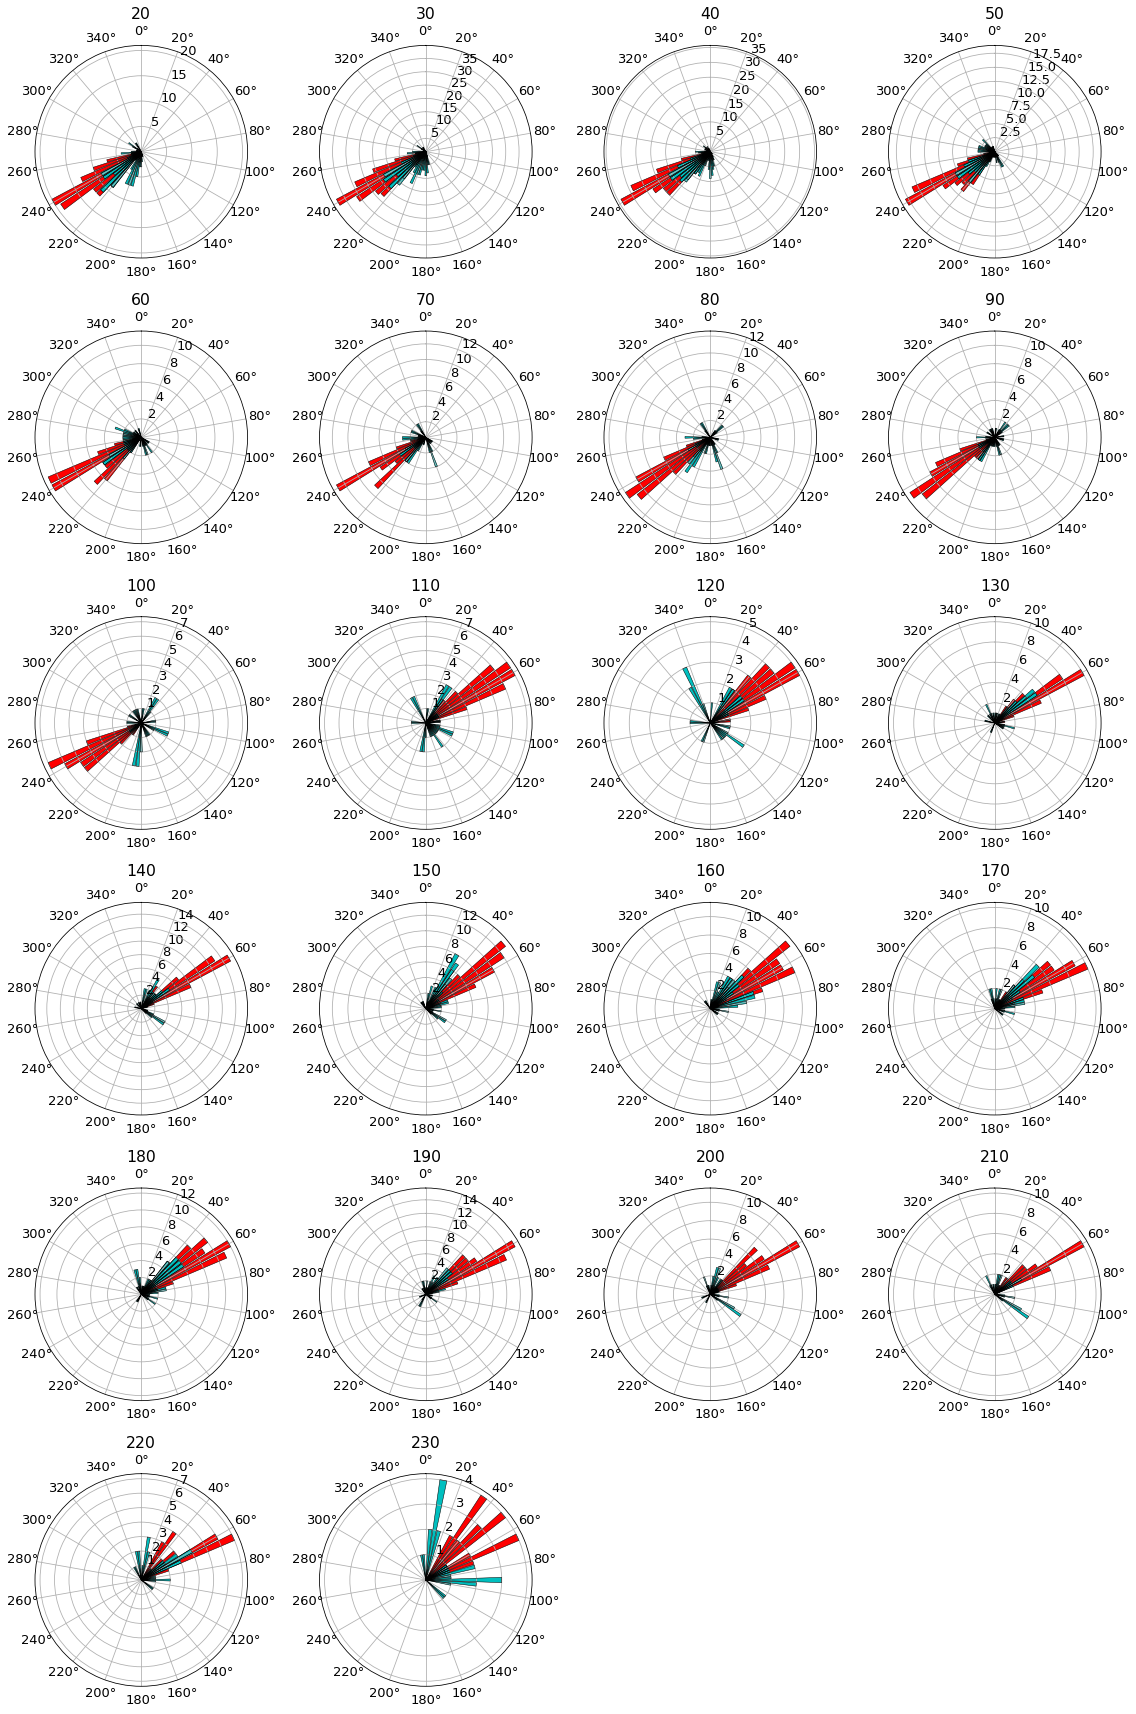

In [54]:
szone = 'hik'

strike = procslabevents['hik']['strike']
dep = procslabevents['hik']['dep']
dip = procslabevents['hik']['dip']
slabstrike = procslabevents['hik']['slabstrike']

fbs = 10

depbin = [x for x in range(20,240,fbs)]
#depbin = [20,40,50,60,70,80,90,100,120,140,160, 280]
#r,c = 0,0
k=1
fig = plt.figure(1, figsize=(16,24))
for db in depbin:
    kstrike, kdep, kslabstrike = [],[],[]
    for s,d,ss in zip(strike, dep, slabstrike):
        if (d>=db-fbs) & (d<=db+fbs):
            kstrike.append(s)
            kdep.append(d)
            if db>100:
                kslabstrike.append((ss-180)%360)
            else:
                kslabstrike.append(ss)
    if kstrike:
        cmean, cstd = circ.meanstats(kslabstrike, high=360, stdev=True)
        print(cmean, cstd)
        ax1 = fig.add_subplot(6,4, k, projection='polar')
        k +=1
        slabrup.plot_hist(kslabstrike, ax=ax1, stitle ='%d' %(db), facecolor='r')
        slabrup.plot_hist(kstrike, ax=ax1, stitle ='%d' %(db), facecolor='c')
fig.tight_layout();

205.72099757980794 0.157612716830767
205.67854382289957 0.19249737702019912
205.55694005023412 0.23868881960628563
205.7767885723693 -0.0
205.69460691385262 0.18790048793728245
205.60708801098505 0.29603715516144785
205.53512804791316 0.2964068597699909
205.66721770118187 0.1976425740628481
205.69458056095894 0.1737504009048803


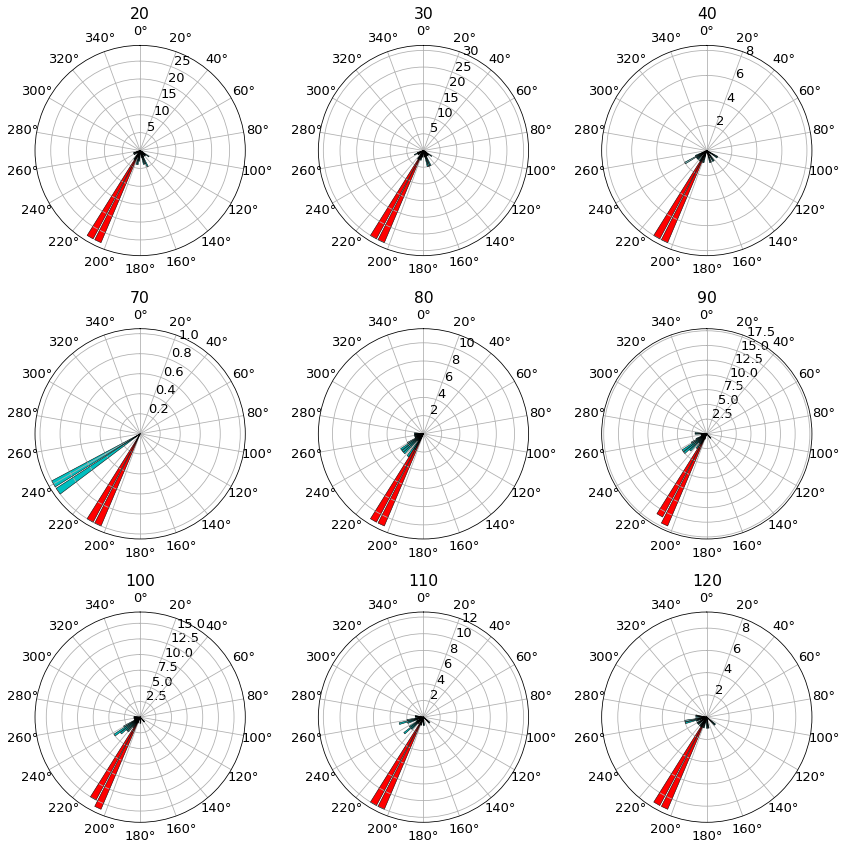

In [53]:
szone = 'puy'

strike = procslabevents[szone]['strike']
dep = procslabevents[szone]['dep']
dip = procslabevents[szone]['dip']
slabstrike = procslabevents[szone]['slabstrike']
fbs = 10
depbin = [x for x in range(20,130,fbs)]
#depbin = [20,40,50,60,70,80,90,100,120,140,160, 280]
#r,c = 0,0
k=1
fig = plt.figure(1, figsize=(12,12))
for db in depbin:
    kstrike, kdep, kslabstrike = [],[],[]
    for s,d,ss in zip(strike, dep, slabstrike):
        if (d>=db-fbs) & (d<=db+fbs):
            kstrike.append(s)
            kdep.append(d)
            kslabstrike.append((ss-180)%360)
    
    if kstrike:
        cmean, cstd = circ.meanstats(kslabstrike, high=360, stdev=True)
        print(cmean, cstd)
        ax1 = fig.add_subplot(3,3, k, projection='polar')
        k +=1
        slabrup.plot_hist(kslabstrike, ax=ax1, stitle ='%d' %(db), facecolor='r')
        slabrup.plot_hist(kstrike, ax=ax1, stitle ='%d' %(db), facecolor='c')
fig.tight_layout();

In [40]:
# def abs_cric_diff(a,b):
#    d = ((a-b)+180)%360-180
#    return abs(d), d
# print(abs_cric_diff(0,334))

In [41]:
#==> corrigendum

In [42]:
def binned_strikes(x, y, fbs =10, min_x = 20, max_x = 300, doplot=True,
                       strtitle='', xlabel='depth (km)', \
                   ylabel = '', ecolor = 'r', ax = None):
    # plot y according to binnned x
    x_bin = [d for d in range(min_x, max_x, fbs)]
    xbox  ={}
    x_means, x_stde = [], []
    
    for xb in x_bin:
        kx =[]
        for xx, yy in zip(x, y):
            if (xx>=(xb-fbs)) & (xx<(xb+fbs)):
                kx.append(yy)
        if len(kx)<5:
            x_means.append(float("nan"))
            x_stde.append(float("nan"))
        else:
            cmean, cstd = circ.meanstats(kx, high=360, stdev=True)
            x_means.append(cmean)
            stde = cstd; #/np.sqrt(len(kx))
            x_stde.append(stde)
            
       #  x_val.append(xb)
    # returns mean, mean+std, mean-std
        xbox.update({xb:kx})
    
    if doplot:
        if ax is None:
            if max_x==300:
                fig, ax = plt.subplots(figsize=(17,2))
            else:
                fig, ax = plt.subplots(figsize=(17,1.2))
          
        X = range(1, len(x_bin)+1)
        ax.errorbar(X, x_means, color = ecolor, xerr = None, linewidth= 0.5,
                    yerr = x_stde, ls='none', markerfacecolor='none', 
                     capsize=3)
        
        
        ax.plot(X,x_means,'ko', markersize=4)
        
        
        #for dat,x in zip(data,X):
        #  plt.text(x,70, str(len(dat)))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_yticks([30, 140, 250, 360])
       
        # xx_bin = [d for d in range(min_x, 300, fbs)]
        # XX = range(1, len(xx_bin)+1)
        ax.set_xticks([x for x in X])
        ax.set_xticklabels([str(xx) for xx in x_bin])
        ax.set_title(strtitle, fontsize=13)
        #ax.set_xlim([0.5, 28+0.5])
        
    return xbox

In [51]:
def evalute_strikediprake_depbin(szone, xslabevents):
    stitle = {'hik': 'Hikurangi Slab', 'puy': 'Puysegur slab'}
    
    
    if szone=='hik': 
        fbs, min_x,max_x  =10, 20, 300
        cdep = 100
    else:
        fbs, min_x,max_x  =10, 20, 200
        cdep = 0
    
    if szone=='hik':
        fig = plt.figure(1, figsize=(13,8))
    else:
        fig = plt.figure(1, figsize=(10,8))
    plt.rcParams.update({'font.size': 13})
    
    ax1 = fig.add_subplot(311)
    # xbox_strike = binned_strikes(xslabevents[szone]['dep'], 
    #                    xslabevents[szone]['strike'], fbs =fbs, min_x = min_x, max_x = max_x,
    #                    strtitle='', ylabel='strike (deg)', ax =ax1);
    
    slabstrikes = []
    sstk = xslabevents[szone]['slabstrike']
    dep = xslabevents[szone]['dep']
    for s,d in zip(sstk, dep):
        if szone=='hik':
            if (d>100): # cdep not suded
                slabstrikes.append((ss-180)%360)
            else:
                slabstrikes.append(ss)
        else:
            slabstrikes.append((ss-180)%360)
    
    xbox_slabstrike = binned_strikes(xslabevents[szone]['dep'], 
                        slabstrikes, fbs =fbs, min_x = min_x, max_x = max_x,
                        strtitle='', ecolor = 'g', ylabel='strike (deg)', ax =ax1);
    
    ax2 = fig.add_subplot(312)
    xbox_dip = slabrup.binned_boxes(xslabevents[szone]['dep'], 
                        xslabevents[szone]['dip'], fbs =fbs, min_x = min_x, max_x = max_x,
                        strtitle='', ylabel='dip (deg)', ax =ax2);
    
    ax3 = fig.add_subplot(313)
    slabrup.binned_boxes(xslabevents[szone]['dep'], 
                        xslabevents[szone]['rake'], fbs =fbs, min_x = min_x, max_x = max_x,
                         strtitle='', ylabel='rake (deg)', ax=ax3);
    
    if szone=='hik':
        ax1.set_xlim([0.5, 24.5])
        ax2.set_xlim([0.5, 24.5])
        ax3.set_xlim([0.5, 24.5])
    else:
        ax1.set_xlim([0.5, 15.5])
        ax2.set_xlim([0.5, 15.5])
        ax3.set_xlim([0.5, 15.5])
    ax1.set_ylim([-60, 360])
    
    fig.suptitle(stitle[szone], fontsize=12, y=0.91) 
     
    stk, stk_sde, X = [],[],[]
    
    for db in xbox_slabstrike.keys():
        ky = xbox_slabstrike[db]
        
        if len(ky)<5:
            if szone=='hik':
                if db>240:
                    ky = xbox_slabstrike[240]
            else:
                continue
                
        cmean, cstd = circ.meanstats(ky, high=360, stdev=True)
        stde = cstd  #/np.sqrt(len(ky))
        stk.append(cmean)
        stk_sde.append(stde)
        X.append(db)
        
    x_bin = [d for d in range(min_x, max_x, fbs)]
   
    if szone =='puy':
       # to allow interpolations
        stk.append(cmean)
        stk_sde.append(cstd)
        X.append(290)
            
    strike_interp = interp1d(X, np.array(stk))
    strikestd_interp = interp1d(X, np.array(stk_sde))
        
    stk, stk_sde, X = [],[],[]
        
    for db in x_bin:
            stk.append(round(strike_interp(db).tolist()))
            stk_sde.append(round(strikestd_interp(db).tolist()))
            X.append(db)
    
    ax1.errorbar([x  for x in range(1,len(x_bin)+1)], stk, ls= '--',
                 yerr = stk_sde, color='g', linewidth=0.2, capsize=3)
    
    ## ------------- strukes done
    
    kstrikes = {}
    for db, s, sse in zip(X, stk, stk_sde):
        kstrikes.update({db: [s, sse]})
        
    
    # -- now dips
    median_dips = []
    X = []
    for db in xbox_dip.keys():
        ky = xbox_dip[db]
        if len(ky)<5:
            continue
        mean_dip = np.median(ky)
        median_dips.append(mean_dip)
        X.append(db)
    if szone =='hik':
        # for interpolations
        median_dips.append(mean_dip)
        X.append(290)
    if szone =='puy':
        # for interpolations
        median_dips.append(60)
        X.append(290)
    
    dip_interp = interp1d(X, np.array(median_dips))
    kdips = {}
    median_dips =[]
    for db in x_bin:
        kdips.update({db: dip_interp(db).tolist()})
        median_dips.append(dip_interp(db).tolist())
        
    ax2.plot([x  for x in range(1,len(x_bin)+1)], median_dips, '--', color='g', linewidth=0.5)
   
    fig.tight_layout()
    
    dep_sdrp ={}
    
    for db in x_bin:
        sdrp = []
        s2, stdstk =kstrikes[db]
        fdip = kdips[db]
        s1 = s2-stdstk
        if s1<0:
            s1=360+s1
        sdrp.append([s1, fdip, -90, 0.32])
        sdrp.append([s2, fdip, -90, 0.36])
        s3 = s2+stdstk
        if s3>360:
            s3=s3-360
        sdrp.append([s3, fdip, -90, 0.32])
        dep_sdrp.update({db:sdrp})
 
    return dep_sdrp
    

/home/kirant/openquake/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/kirant/openquake/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


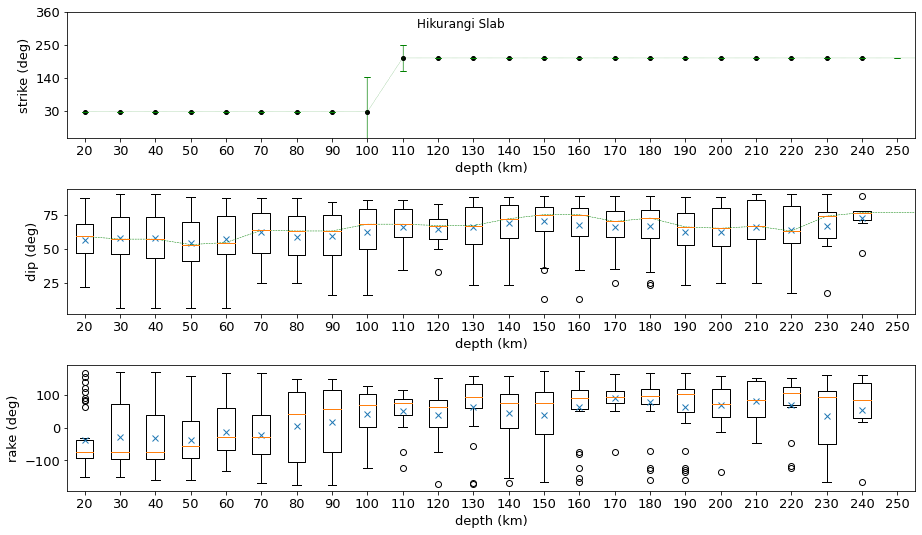

In [52]:
slabrupgeom_hik = evalute_strikediprake_depbin('hik', procslabevents);

In [29]:
slabrupgeom_hik

{20: [[197, 59.0, -90, 0.32], [229, 59.0, -90, 0.36], [261, 59.0, -90, 0.32]],
 30: [[189, 57.0, -90, 0.32], [223, 57.0, -90, 0.36], [257, 57.0, -90, 0.32]],
 40: [[184, 57.0, -90, 0.32], [223, 57.0, -90, 0.36], [262, 57.0, -90, 0.32]],
 50: [[189, 53.0, -90, 0.32], [238, 53.0, -90, 0.36], [287, 53.0, -90, 0.32]],
 60: [[191, 54.5, -90, 0.32], [245, 54.5, -90, 0.36], [299, 54.5, -90, 0.32]],
 70: [[182, 63.5, -90, 0.32], [237, 63.5, -90, 0.36], [292, 63.5, -90, 0.32]],
 80: [[132, 63.0, -90, 0.32], [203, 63.0, -90, 0.36], [274, 63.0, -90, 0.32]],
 90: [[124, 63.0, -90, 0.32], [214, 63.0, -90, 0.36], [304, 63.0, -90, 0.32]],
 100: [[3, 68.0, -90, 0.32], [127, 68.0, -90, 0.36], [251, 68.0, -90, 0.32]],
 110: [[20, 68.0, -90, 0.32], [98, 68.0, -90, 0.36], [176, 68.0, -90, 0.32]],
 120: [[311, 67.0, -90, 0.32], [32, 67.0, -90, 0.36], [113, 67.0, -90, 0.32]],
 130: [[333, 67.0, -90, 0.32], [34, 67.0, -90, 0.36], [95, 67.0, -90, 0.32]],
 140: [[351, 72.0, -90, 0.32], [43, 72.0, -90, 0.36], [

/home/kirant/openquake/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/kirant/openquake/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


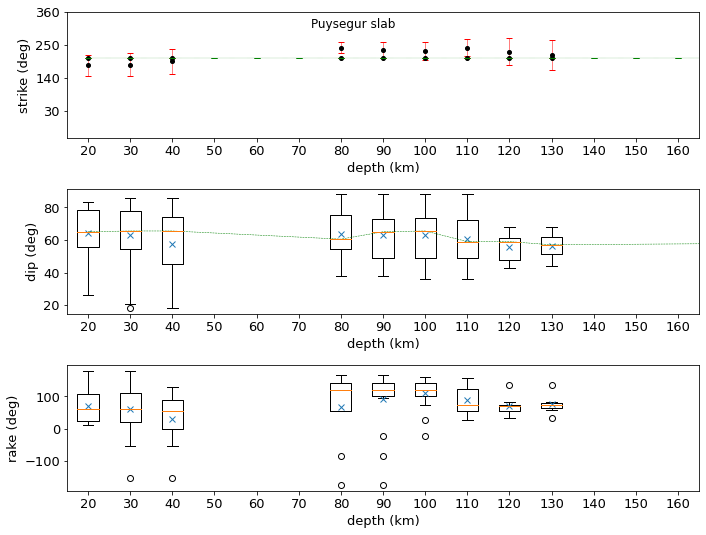

In [46]:
slabrupgeom_puy = evalute_strikediprake_depbin('puy', procslabevents);

In [ ]:
slabrupgeom_puy

In [ ]:
slabrupgeom = {'hik': slabrupgeom_hik, 'puy': slabrupgeom_puy}
import json
with open("slab-faulting2.json", "w") as f:
    json.dump(slabrupgeom, f) 
    
print(slabrupgeom)